<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [253]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
import math
seaborn.set_context('talk')
from scipy import stats


In [180]:
#!pip install plotly --upgrade

In [3]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

In [4]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [233]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [234]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [235]:
melb_df.groupby(['Type']).count()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Type,,,,,,,,,,,,,,,,,,,,
h,9449,9449,9449,9449,9449,9449,9449,9449,9449,9449,9449,9389,9449,4860,5408,8204,9449,9449,9449,9449
t,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,1114,686,762,1045,1114,1114,1114,1114
u,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017,3015,3017,1584,2035,2962,3017,3017,3017,3017


In [236]:
melb_df.groupby(['Method']).count()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Method,,,,,,,,,,,,,,,,,,,,
PI,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564,1557,1564,870,995,1416,1564,1564,1564,1564
S,9022,9022,9022,9022,9022,9022,9022,9022,9022,9022,9022,8988,9022,4568,5271,8111,9022,9022,9022,9022
SA,92,92,92,92,92,92,92,92,92,92,92,91,92,44,50,81,92,92,92,92
SP,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1703,1695,1703,1012,1136,1536,1703,1703,1703,1703
VB,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1199,1187,1199,636,753,1067,1199,1199,1199,1199


In [237]:
melb_df.groupby(['Postcode']).count()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Postcode,,,,,,,,,,,,,,,,,,,,
3000.0,46,46,46,46,46,46,46,46,46,46,46,46,46,32,37,46,46,46,46,46
3002.0,22,22,22,22,22,22,22,22,22,22,22,22,22,8,8,22,22,22,22,22
3003.0,31,31,31,31,31,31,31,31,31,31,31,31,31,19,23,29,31,31,31,31
3006.0,41,41,41,41,41,41,41,41,41,41,41,41,41,26,34,41,41,41,41,41
3008.0,3,3,3,3,3,3,3,3,3,3,3,3,3,1,0,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
3810.0,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,3,3,3,3,3
3910.0,6,6,6,6,6,6,6,6,6,6,6,6,6,2,3,5,6,6,6,6


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades. 

Usar Rango Intercuartil para sacar outlayers (Podemos usar lo del práctico 1, ver si tenemos alguna función en python que haga todo directamente)
 

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.

  1. Justificar cada columna no seleccionada.

  Ver si hay correlación entre variables
  Ver si las columnas tienen buen volumen de datos (cuantos NaN hay) y si no es así ver si se elimina o se imputa
  
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.
    

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


## Ejercicio 1: 

### Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [238]:
rows = melb_df.shape[0]

In [239]:
tmp = melb_df.isna().sum()

In [240]:

df_isna_data = {'columns' :tmp.index.values , 'isnacount' : tmp.values }
df_isna = pandas.DataFrame ( df_isna_data )
df_isna['porc'] = df_isna.apply( lambda x : round( x['isnacount'] / rows , 2) * 100 ,axis=1) 
df_isna

,columns,isnacount,porc
0,Suburb,0,0.0
1,Address,0,0.0
2,Rooms,0,0.0
3,Type,0,0.0
4,Price,0,0.0
5,Method,0,0.0
6,SellerG,0,0.0
7,Date,0,0.0
8,Distance,0,0.0
9,Postcode,0,0.0


Las columnas *BuildingArea* y *YearBuilt* tiene un faltante de datos significativos. Procedemos a eliminar las columnas. Dejamos la columna *CouncilArea* para hacer la imputación.

In [241]:
# Evitamos tirar un error en el caso de ejectuar varias veces esta celda
if ('BuildingArea' in melb_df.columns or 'YearBuilt' in melb_df.columns ):
    melb_df.drop(  columns=['BuildingArea','YearBuilt'],  axis = 'columns' , inplace=True)
melb_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [242]:
def display_blox_plots(df, columns , scale = False ):

    row_idx = 0
    col_idx = 0 
    
    columns_count = len (columns)
    
    def internal_dipsplay_box_plots (df, column , ax_x , scale) :

        column_max_value = df[column].max()
        
        seaborn.boxplot(ax = ax_x ,  data=df[column]/1000 if scale and column_max_value > 1000 else df[column]  , orient='h')
        ax_x.set_title( f"{column} expresado en 1000" if  scale and column_max_value > 1000 else column)
      
    if (columns_count == 1):
        
        fig, axes = plt.subplots(1, 1 , figsize=(18, 10))
        internal_dipsplay_box_plots(df, columns[0] , axes, scale )    
  
    elif (columns_count == 2):
        
        fig, axes = plt.subplots(1, 2 , figsize=(18, 10))
        for column in columns:
            internal_dipsplay_box_plots(df, column , axes[col_idx], scale ) 
            col_idx = col_idx + 1
    else:
        # Se debe hacer de manera automatica el calculo de figsize
        fig, axes = plt.subplots(int(math.ceil(len(columns) / 2 )), 2 , figsize=(18, 8 * int(math.ceil(len(columns) / 2 ))))
        
        for column in columns:
            internal_dipsplay_box_plots(df, column , axes[row_idx][col_idx], scale ) 
            col_idx = col_idx + 1
            if (col_idx == 2):
                col_idx = 0 
                row_idx = row_idx + 1     

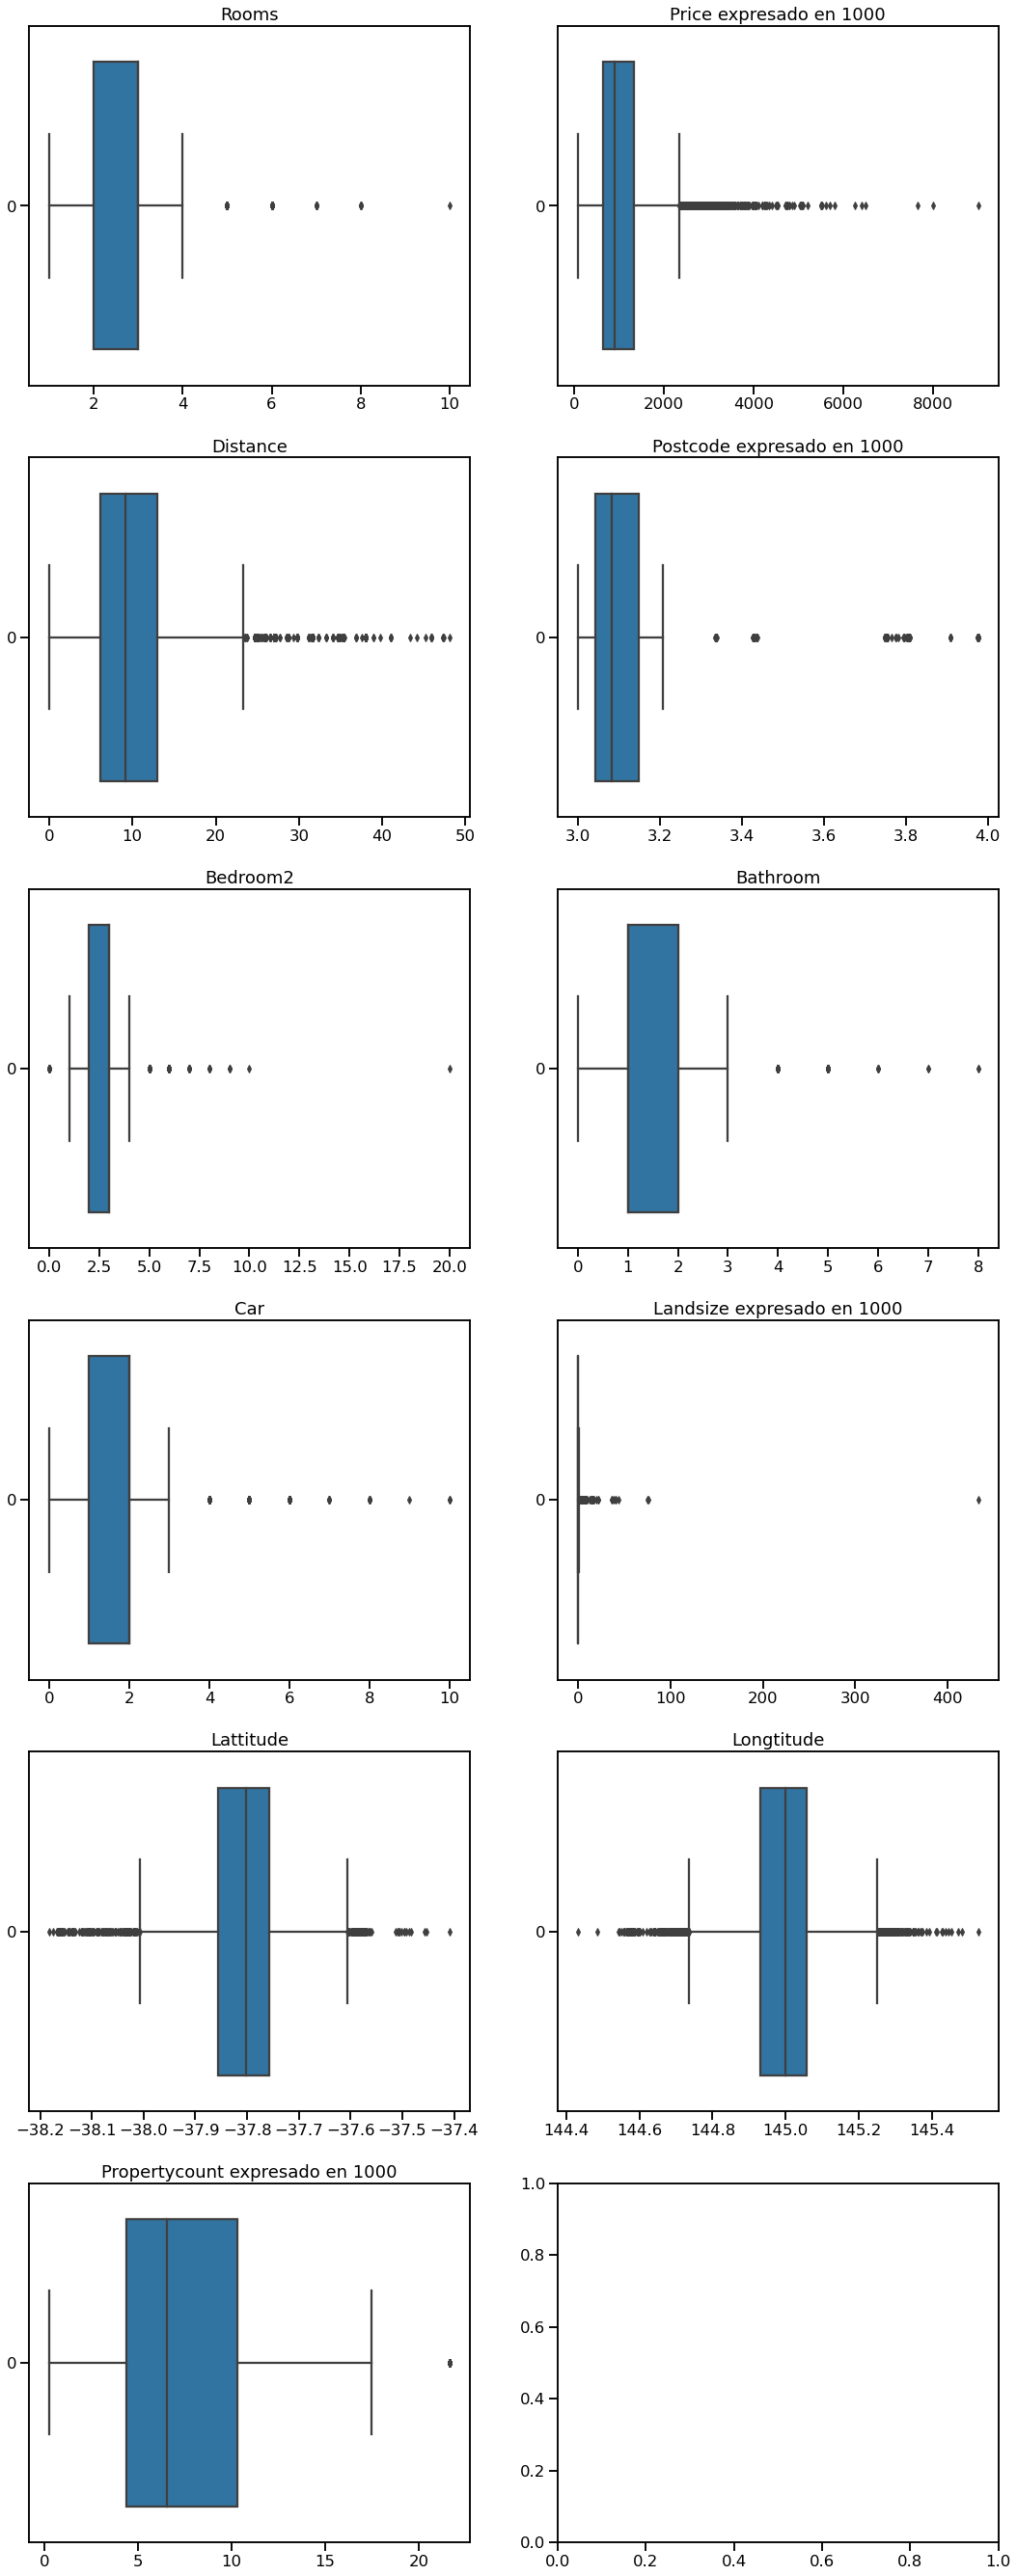

In [243]:
columns_to_plot = melb_df.select_dtypes(include=numpy.number).columns.tolist()
display_blox_plots(melb_df , columns_to_plot , scale=True)

In [251]:
class IqrStrategy:
        
    def process(self, df, column):
    
        q_75 = df[column].quantile(0.75)
        q_25 = df[column].quantile(0.25)

        iqr = q_75 - q_25
        ul = q_75 + iqr * 1.5
        bl = q_25 - iqr * 1.5
        
        filtered = df[(df[column] >= bl) &  (df[column] <= ul) ] 
      
        return filtered

   
class UpperLowerStrategy:
    """This class removes from the dataframe, all the rows which column values are > ul and < bl
        
        Parameters:
        bl (float): Value between 0 and 1. Indicates the below limit
        ul (float): Value between 0 and 1. Indicates the uper limit
        
        
    """
    
    def __init__(self, bl, ul):
        self.bl_ = bl
        self.ul_ = ul
    
    def process(self, df, column):
        '''
        Removes outliers from df[column]
        
        Parameters:
            df (dataframe):Dataframe to be processed
            column (string): Name of the column to be cleaned

        Returns:
            filtered(Dataframe): A dataframe with the rows where the column column us between bl and ul  
        '''

    
        bl = df[column].quantile(self.bl_)
        ul  = df[column].quantile(self.ul_)

        filtered = df[(df[column] >= bl) &  (df[column] <= ul) ] 
        
        return filtered



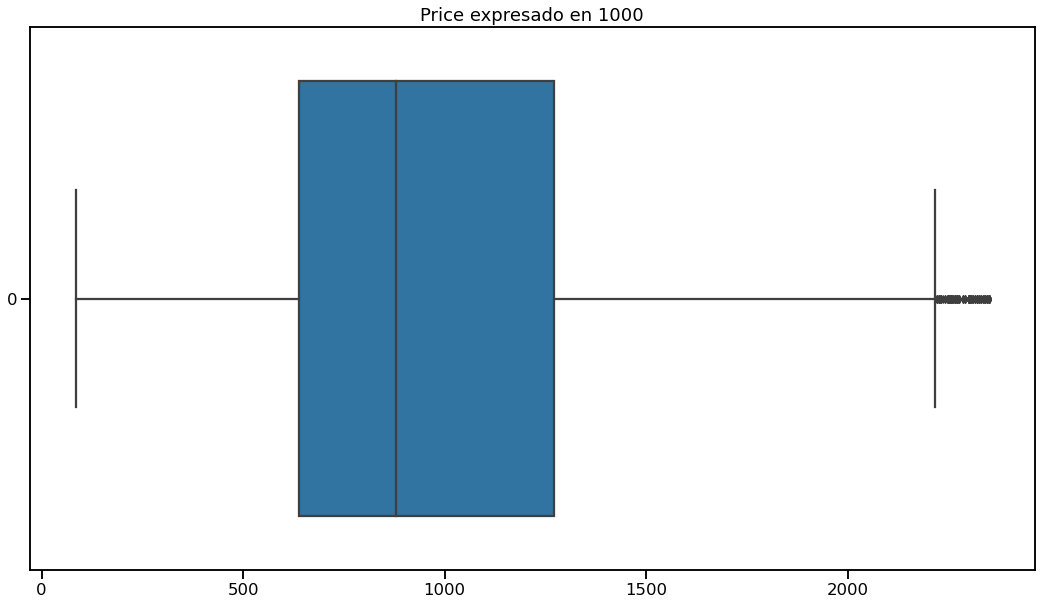

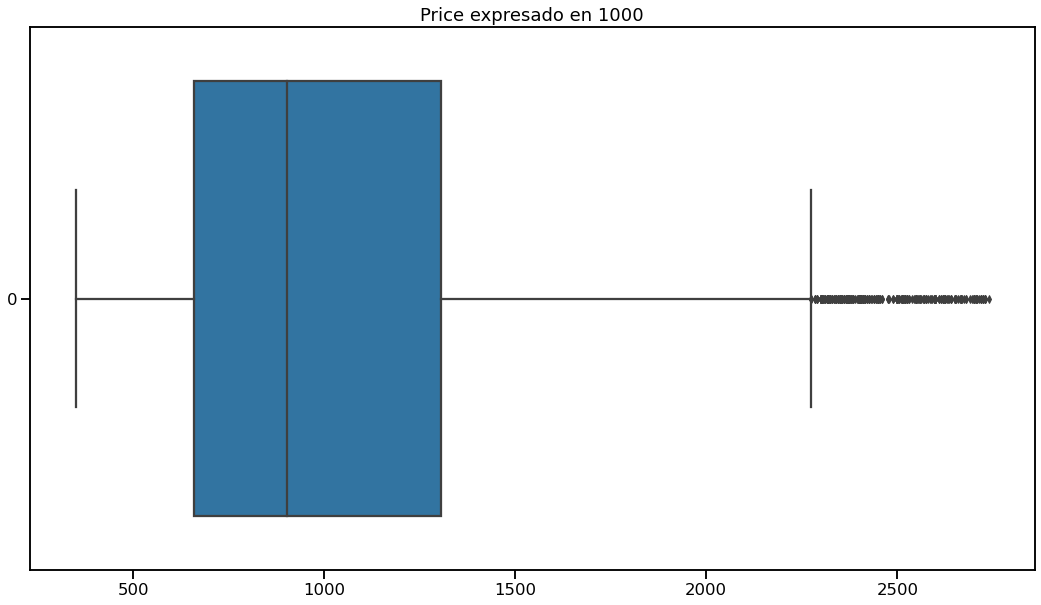

In [254]:
iqrstrategy = IqrStrategy()
tmp_test = iqrstrategy.process(melb_df, 'Price')
tmp_test
display_blox_plots(tmp_test , ['Price'] , scale=True)

ubstrategy = UpperLowerStrategy(0.025,0.975)
tmp_test = ubstrategy.process(melb_df, 'Price')
tmp_test
display_blox_plots(tmp_test , ['Price'] , scale=True)


In [255]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [11]:
airbnb_df[:3]

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.